試用現有資料 和SIRD模型 
找出不隨時間變化的參數 
感染率beta 
復原率 gamma
死亡率 mu

In [1]:
import requests
import pandas as pd
import torch.optim as optim
import numpy as np

#收集從1月27日到九月中的資料
DATA=[]


將每個月分的資料以月為單位讀入

In [2]:
for i in range(27,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [3]:
for i in range(1,30):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [4]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [5]:
for i in range(1,31):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [6]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [7]:
for i in range(1,31):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [8]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [9]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [10]:
for i in range(1,31):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [11]:
for i in range(1,32):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/10-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

In [12]:
for i in range(1,31):
  url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/11-'+str(i)+'-2020.csv'
  res = requests.get(url, allow_redirects=True)
  with open('covid.csv','wb') as file:
     file.write(res.content)
  DATA.append(pd.read_csv('covid.csv'))

實際的執行結果放在最底下，接下來內容是分段敘述各步驟內容


取出特定國家的資料

In [13]:
def Data_of_Country(num): 
  Data_Country=[]
  
  for i in range(len(DATA)):
    if 'Country/Region' in DATA[i]:
      fliter = (DATA[i]['Country/Region']==Country[num])
      if len(DATA[i][fliter])>0:
        
        Data_Country.append(DATA[i][fliter])
      #else:

      #fliter2 = (DATA[i-1]['Country/Region']==Country[num])
      #Data_Country.append(DATA[i-1][fliter2])
    
    elif 'Country_Region' in DATA[i]:
      fliter = (DATA[i]['Country_Region']==Country[num])
      
      if len(DATA[i][fliter])>0:
        Data_Country.append(DATA[i][fliter])
      #else:
        #if i>0:
        #  yesterday=DATA[i-1][DATA[i-1]['Country_Region']==Country[num]]
        #  Data_Country.append(yesterday)
     
  return Data_Country

取得每天的 S(疑似) I(感染) R(復原) D(死亡) 資料

In [14]:
def take_SIRD_data(Data_Country,number):
  num_of_Data_Country=len(Data_Country)
  N=population_N[number]
  St=[]
  for i in range(num_of_Data_Country):
    St.append(N-Data_Country[i]['Confirmed'].sum()-Data_Country[i]['Deaths'].sum()-Data_Country[i]['Recovered'].sum())
  St=np.array(St)
  It=[]
  for i in range(num_of_Data_Country):
    It.append(Data_Country[i]['Confirmed'].sum())
  It=np.array(It)
  Rt=[]
  for i in range(num_of_Data_Country):
    Rt.append(Data_Country[i]['Recovered'].sum())
  Rt=np.array(Rt)
  Dt=[]
  for i in range(num_of_Data_Country):
    Dt.append(Data_Country[i]['Deaths'].sum())
  Dt=np.array(Dt)

  return St,It,Rt,Dt

In [15]:
def SIRD_data(DATA,num):
  It=[]
  Rt=[]
  Dt=[]
  for i in range(len(DATA)):
    if 'Country/Region' in DATA[i]:
      fliter = (DATA[i]['Country/Region']==Country[num])
      if len(DATA[i][fliter])>0:
        It.append(DATA[i][fliter]['Confirmed'].sum())
        Rt.append(DATA[i][fliter]['Recovered'].sum())
        Dt.append(DATA[i][fliter]['Deaths'].sum())
      else:
        It.append(0)
        Rt.append(0)
        Dt.append(0)
    elif 'Country_Region' in DATA[i]:
      fliter = (DATA[i]['Country_Region']==Country[num])
      if len(DATA[i][fliter])>0:
        It.append(DATA[i][fliter]['Confirmed'].sum())
        Rt.append(DATA[i][fliter]['Recovered'].sum())
        Dt.append(DATA[i][fliter]['Deaths'].sum())
      else:
        It.append(0)
        Rt.append(0)
        Dt.append(0)
  It=np.array(It)
  Rt=np.array(Rt)
  Dt=np.array(Dt)
  return It,Rt,Dt



最小化loss function
初始猜測 參數

In [27]:
#[St_now,It_now,Rt_now,Dt_now]=take_SIRD_data(Data_Country,0)
#St_now=St_now[0:len(St_now)-1]
#It_now=It_now[0:len(It_now)-1]
#Rt_now=Rt_now[0:len(Rt_now)-1]
#Dt_now=Dt_now[0:len(Dt_now)-1]

In [28]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
  St_pred=[]
  It_pred=[]
  Dt_pred=[]
  Rt_pred=[]
  #參數 dt 單位天數
  dt=1
  eps=0.0000001
  beta=x[0]
  gamma=x[1]
  mu=x[2]
  N=population_N[number]
  #[St_now,It_now,Rt_now,Dt_now]=take_SIRD_data(Data_Country,number)
  ##St_now=St_now[0:len(St_now)-1]
  #It_now=It_now[0:len(It_now)-1]
  ##Rt_now=Rt_now[0:len(Rt_now)-1]
  #Dt_now=Dt_now[0:len(Dt_now)-1]
#藉由finite difference method 做出下一個時間點的預測
   
  St_pred.append(St_now*(1-dt*beta*It_now/N))
  It_pred.append(It_now*(1+dt*(beta*St_now/N)-dt*(mu+gamma)))
  Rt_pred.append(Rt_now+(dt*gamma*It_now))
  Dt_pred.append(Dt_now+(dt*mu*It_now))
  
  # loss function 只取用論文中使用的loss function的前兩項
  loss=(100/len(It_pred))*(((It_true-It_pred)**2).sum()+((Dt_true-Dt_pred)**2).sum())                                                                                                                
  return loss


In [191]:
def find_parameter(num):
  # initial guesses
  beta = 0.1
  gamma = 0.1
  mu = 0.001
  population_N[num]

  x0 = np.zeros(3)
  x0[0] = beta
  x0[1] = gamma
  x0[2] = mu
  b = (0.0,1.0)
  bnds = (b, b, b)

  Sol=minimize(objective,x0,bounds=bnds,options= {'disp':True,'maxiter':6000000})
  return Sol.x

In [192]:
def predict(beta,gamma,mu,N):
  dt=1
  St_pred=St_now*(1-dt*beta*It_now/N)
  It_pred=It_now*(1+dt*(beta*St_now/N)-(mu+gamma))
  Rt_pred=Rt_now+(dt*gamma*It_now)
  Dt_pred=Dt_now+(dt*mu*It_now)
  return St_pred,It_pred,Rt_pred,Dt_pred

初始猜測

In [193]:
#國家人口數據
Country=['Italy','Germany','United Kingdom','Spain','US','France','China','Belgium','Egypt','Kenya']
population_N=[60.36*1000000, 83.02*1000000 ,66.56*1000000 ,46.94*1000000 ,327.2*1000000 ,66.99*1000000, 1386*1000000 ,11.46*1000000,10*1000000,4.8*1000000]

In [194]:
#紀錄各國家的參數
lists=[[[],[],[]],
    [[],[],[]],
    [[],[],[]],
    [[],[],[]],
    [[],[],[]],
    [[],[],[]],
    [[],[],[]],
    [[],[],[]],
    [[],[],[]]
  ]
len(lists)

9

In [195]:
for n in range(len(lists)):
  beta = 0.1
  gamma = 0.1
  mu = 0.001
  St_preds=[]
  It_preds=[]
  Rt_preds=[]
  Dt_preds=[]
  BETA=[]
  Gamma=[]
  Mu=[]
  number=n
  Data_Country=Data_of_Country(number)
  [St,It,Rt,Dt]=take_SIRD_data(Data_Country,number)
  N=population_N[number]
  
  St_now=St[0]
  It_now=It[0]
  Dt_now=Dt[0]
  Rt_now=Rt[0]
  dt=1
  
  Nday=len(St)-1
  for i in range(Nday):

    St_pred=(St_now*(1-dt*beta*It_now/N))
    It_pred=It_now*(1+dt*(beta*St_now/N)-dt*(mu+gamma))
    Rt_pred=Rt_now+(dt*gamma*It_now)
    Dt_pred=Dt_now+(dt*mu*It_now)

    St_true=St[i+1]
    It_true=It[i+1]
    Rt_true=Rt[i+1]
    Dt_true=Dt[i+1]
    [beta,gamma,mu]=find_parameter(number)
    [St_pred,It_pred,Rt_pred,Dt_pred]=predict(beta,gamma,mu,N)

    St_preds.append(St_pred)
    It_preds.append(It_pred)
    Rt_preds.append(Rt_pred)
    Dt_preds.append(Dt_pred)
    BETA.append(beta)
    Gamma.append(gamma)
    Mu.append(mu)

    St_now=St_pred
    It_now=It_pred
    Rt_now=Rt_pred
    Dt_now=Dt_pred
  
  St_preds=np.array(St_preds)
  It_preds=np.array(It_preds)
  Rt_preds=np.array(Rt_preds)
  Dt_preds=np.array(Dt_preds)

  lists[n]=[BETA,Gamma,Mu]


In [196]:
[Italy_beta,Italy_gamma,Italy_mu]=lists[0]
[Germany_beta,Germany_gamma,Germany_mu]=lists[1]

[UK_beta,UK_gamma,UK_mu]=lists[2]

[Spain_beta,Spain_gamma,Spain_mu]=lists[3]

[US_beta,US_gamma,US_mu]=lists[4]
[France_beta,France_gamma,France_mu]=lists[5]

[China_beta,China_gamma,China_mu]=lists[6]

[Belgium_beta,Belgium_gamma,Belgium_mu]=lists[7]
#Egypt_beta=BETA
#Egypt_gamma=Gamma
#Egypt_mu=Mu


用plotly做的可互動的圖表

In [197]:
import plotly.graph_objects as go

#fig = go.Figure(data=go.Scatter(x=US_beta, y=US_gamma, mode='markers'))
#fig = go.Figure(data=go.Scatter(x=UK_beta, y=UK_gamma, mode='markers'))
fig = go.Figure()

# Add traces

fig.add_trace(go.Scatter(x=Italy_beta, y=Italy_gamma, mode='markers',name='Italy'))
fig.add_trace(go.Scatter(x=Germany_beta, y=Germany_gamma, mode='markers',name='Germany'))
fig.add_trace(go.Scatter(x=UK_beta, y=UK_gamma, mode='markers',name='UK'))
fig.add_trace(go.Scatter(x=Spain_beta, y=Spain_gamma, mode='markers',name='Spain'))
fig.add_trace(go.Scatter(x=US_beta, y=US_gamma, mode='markers',name='US'))
fig.add_trace(go.Scatter(x=France_beta, y=France_gamma, mode='markers',name='France'))
fig.add_trace(go.Scatter(x=China_beta, y=China_gamma, mode='markers',name='China'))
fig.add_trace(go.Scatter(x=Belgium_beta, y=Belgium_gamma, mode='markers',name='Belgium'))


fig.update_layout(
    #title="Plot Title",
    xaxis_title="beta",
    yaxis_title="gamma",
)


fig.show()

In [187]:
total_gamma=np.array([Italy_gamma+Germany_gamma+UK_gamma+Spain_gamma+US_gamma+France_gamma+China_gamma+Belgium_gamma])
total_beta=np.array([Italy_beta+Germany_beta+UK_beta+Spain_beta+US_beta+France_beta+China_beta+Belgium_beta])
np.corrcoef([total_gamma[0],total_beta[0]])


array([[ 1.        , -0.69474671],
       [-0.69474671,  1.        ]])

In [198]:

fig1 = go.Figure()

fig1.add_trace(go.Scatter(x=np.linspace(0,len(Italy_beta),len(Italy_beta)), y=Italy_beta, mode='lines+markers',name='Italy'))
fig1.add_trace(go.Scatter(x=np.linspace(0,len(Germany_beta),len(Germany_beta)), y=Germany_beta, mode='lines+markers',name='Germany'))
fig1.add_trace(go.Scatter(x=np.linspace(0,len(UK_beta),len(UK_beta)), y=UK_beta, mode='lines+markers',name='UK'))
fig1.add_trace(go.Scatter(x=np.linspace(0,len(Spain_beta),len(Spain_beta)), y=Spain_beta, mode='lines+markers',name='Spain'))
fig1.add_trace(go.Scatter(x=np.linspace(0,len(US_beta),len(US_beta)), y=US_beta, mode='lines+markers',name='US'))
fig1.add_trace(go.Scatter(x=np.linspace(0,len(France_beta),len(France_beta)), y=France_beta, mode='lines+markers',name='France'))
fig1.add_trace(go.Scatter(x=np.linspace(0,len(China_beta),len(China_beta)), y=China_beta, mode='lines+markers',name='China'))
fig1.add_trace(go.Scatter(x=np.linspace(0,len(Belgium_beta),len(Belgium_beta)), y=Belgium_beta, mode='lines+markers',name='Belgium'))



fig1.update_layout(
    #title="Plot Title",
    xaxis_title="days",
    yaxis_title="beta",
)

fig1.show()

In [199]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=np.linspace(0,len(Italy_gamma),len(Italy_gamma)), y=Italy_gamma, mode='lines+markers',name='Italy'))
fig2.add_trace(go.Scatter(x=np.linspace(0,len(Germany_gamma),len(Germany_gamma)), y=Germany_gamma, mode='lines+markers',name='Germany'))
fig2.add_trace(go.Scatter(x=np.linspace(0,len(UK_gamma),len(UK_gamma)), y=UK_gamma, mode='lines+markers',name='UK'))
fig2.add_trace(go.Scatter(x=np.linspace(0,len(Spain_gamma),len(Spain_gamma)), y=Spain_gamma, mode='lines+markers',name='Spain'))
fig2.add_trace(go.Scatter(x=np.linspace(0,len(US_gamma),len(US_gamma)), y=US_gamma, mode='lines+markers',name='US'))
fig2.add_trace(go.Scatter(x=np.linspace(0,len(France_gamma),len(France_gamma)), y=France_gamma, mode='lines+markers',name='France'))
fig2.add_trace(go.Scatter(x=np.linspace(0,len(China_gamma),len(China_gamma)), y=China_gamma, mode='lines+markers',name='China'))
fig2.add_trace(go.Scatter(x=np.linspace(0,len(Belgium_gamma),len(Belgium_gamma)), y=Belgium_gamma, mode='lines+markers',name='Belgium'))



fig2.update_layout(
    #title="Plot Title",
    xaxis_title="days",
    yaxis_title="gamma",
)

fig2.show()

In [200]:
fig3 = go.Figure()

fig3.add_trace(go.Scatter(x=np.linspace(0,len(Italy_mu),len(Italy_mu)), y=Italy_mu, mode='lines+markers',name='Italy'))
fig3.add_trace(go.Scatter(x=np.linspace(0,len(Germany_mu),len(Germany_mu)), y=Germany_mu, mode='lines+markers',name='Germany'))
fig3.add_trace(go.Scatter(x=np.linspace(0,len(UK_mu),len(UK_mu)), y=UK_mu, mode='lines+markers',name='UK'))
fig3.add_trace(go.Scatter(x=np.linspace(0,len(Spain_mu),len(Spain_mu)), y=Spain_mu, mode='lines+markers',name='Spain'))
fig3.add_trace(go.Scatter(x=np.linspace(0,len(US_mu),len(US_mu)), y=US_mu, mode='lines+markers',name='US'))
fig3.add_trace(go.Scatter(x=np.linspace(0,len(France_mu),len(France_mu)), y=France_mu, mode='lines+markers',name='France'))
fig3.add_trace(go.Scatter(x=np.linspace(0,len(China_mu),len(China_mu)), y=China_mu, mode='lines+markers',name='China'))
fig3.add_trace(go.Scatter(x=np.linspace(0,len(Belgium_mu),len(Belgium_mu)), y=Belgium_gamma, mode='lines+markers',name='Belgium'))



fig3.update_layout(
    #title="Plot Title",
    xaxis_title="days",
    yaxis_title="mu",
)

fig3.show()

可取得個別國家的參數 及 S(t) Ｉ(t) R(t) D(t) 的值

In [231]:
#Country中國家的編號
number=1
#def result(number):
beta = 0.01
gamma = 0.01
mu = 0.001
St_preds=[]
It_preds=[]
Rt_preds=[]
Dt_preds=[]
BETA=[]
Gamma=[]
Mu=[]

  # 取某國家資料
Data_Country=Data_of_Country(number)
[St,It,Rt,Dt]=take_SIRD_data(Data_Country,number)
N=population_N[number]
  #第一天
St_now=St[0]
It_now=It[0]
Dt_now=Dt[0]
Rt_now=Rt[0]
dt=1
  #天數
Nday=len(St)-1
  #計算每天的SIDR各項人數 及 參數

  
for i in range(Nday):
    
  St_pred=(St_now*(1-dt*beta*It_now/N))
  It_pred=It_now*(1+dt*(beta*St_now/N)-dt*(mu+gamma))
  Rt_pred=Rt_now+(dt*gamma*It_now)
  Dt_pred=Dt_now+(dt*mu*It_now)

  St_true=St[i+1]
  It_true=It[i+1]
  Rt_true=Rt[i+1]
  Dt_true=Dt[i+1]
  [beta,gamma,mu]=find_parameter(number)
  [St_pred,It_pred,Rt_pred,Dt_pred]=predict(beta,gamma,mu,N)

  St_preds.append(St_pred)
  It_preds.append(It_pred)
  Rt_preds.append(Rt_pred)
  Dt_preds.append(Dt_pred)
  BETA.append(beta)
  Gamma.append(gamma)
  Mu.append(mu)

  St_now=St_pred
  It_now=It_pred
  Rt_now=Rt_pred
  Dt_now=Dt_pred
  
St_preds=np.array(St_preds)
It_preds=np.array(It_preds)
Rt_preds=np.array(Rt_preds)
Dt_preds=np.array(Dt_preds)

  #return Dt_preds#,It_preds,Rt_preds,Dt_preds,BETA,Gamma,Mu

In [232]:
Italy_beta=BETA
Italy_gamma=Gamma
Italy_mu=Mu


#Germany_beta=BETA
#Germany_gamma=Gamma
#Germany_mu=Mu


#UK_beta=BETA
#UK_gamma=Gamma
#UK_mu=Mu


#Spain_beta=BETA
#Spain_gamma=Gamma
#Spain_mu=Mu

#US_beta=BETA
#US_gamma=Gamma
#US_mu=Mu

#France_beta=BETA
#France_gamma=Gamma
#France_mu=Mu

#China_beta=BETA
#China_gamma=Gamma
#China_mu=Mu

#Belgium_beta=BETA
#Belgium_gamma=Gamma
#Belgium_mu=Mu

#Egypt_beta=BETA
#Egypt_gamma=Gamma
#Egypt_mu=Mu

Kenya_beta=BETA
Kenya_gamma=Gamma
Kenya_mu=Mu


註 下圖藍線為model預測結果 橘線為實際資料 因為人數已千或萬人為單位，所以看不太出人數的差別。
故，另外計算實際最大誤差人數

最大誤差 2.3994206147127784e-05


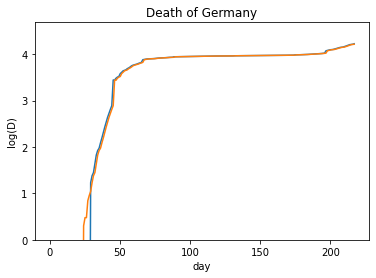

In [233]:
import matplotlib.pyplot as plt
eps=0.00001
dat=np.linspace(0,len(Dt)-1,len(Dt)-1)

plt.plot(dat,np.log10(Dt_preds+eps)) #預測人數
plt.plot(dat,np.log10(Dt[0:len(Dt)-1]+eps))      #實際人數


plt.title('Death of '+Country[number])
plt.xlabel('day')
plt.ylabel('log(D)')
plt.ylim((0))
print('最大誤差',np.linalg.norm((Dt_preds-Dt[0:len(Dt)-1]),np.inf)/N)

最大誤差 0.0022151649965301457


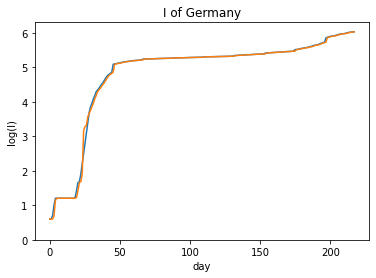

In [234]:
dat=np.linspace(0,len(It)-1,len(It)-1)
eps=0.00001

plt.plot(dat,np.log10(It_preds+eps)) #預測人數
plt.plot(dat,np.log10(It[0:len(It)-1]+eps))      #實際人數

plt.title('I of '+Country[number])
plt.xlabel('day')
plt.ylabel('log(I)')
plt.ylim((0))
print('最大誤差',np.linalg.norm((It_preds-It[0:len(It)-1]),np.inf)/N)


最大誤差 0.05443398099176063


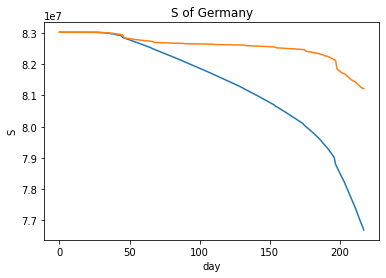

In [235]:
dat=np.linspace(0,len(St)-1,len(St)-1)
eps=0.00001

plt.plot(dat,(St_preds+eps)) #預測人數
plt.plot(dat,(St[0:len(St)-1]))      #實際人數

plt.title('S of '+Country[number])
plt.xlabel('day')
plt.ylabel('S')
#plt.ylim((0))
print('最大誤差',np.linalg.norm((St_preds-St[0:len(St)-1]),np.inf)/N)

最大誤差 0.05425801156435975


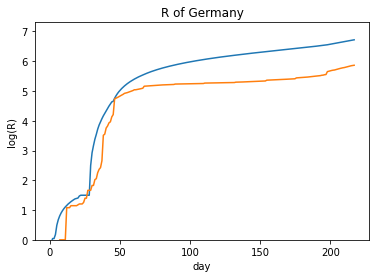

In [236]:
dat=np.linspace(0,len(Rt)-1,len(Rt)-1)
eps=0.00001

plt.plot(dat,np.log10(Rt_preds+eps)) #預測人數
plt.plot(dat,np.log10(Rt[0:len(Rt)-1]+eps))      #實際人數

plt.title('R of '+Country[number])
plt.xlabel('day')
plt.ylabel('log(R)')
plt.ylim((0))
print('最大誤差',np.linalg.norm((Rt_preds-Rt[0:len(Rt)-1]),np.inf)/N)



Text(0, 0.5, 'beta')

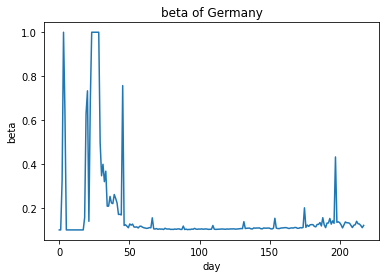

In [237]:
dat=np.linspace(0,len(BETA),len(BETA))
plt.plot(dat,(BETA)) 
plt.title('beta of '+Country[number])
plt.xlabel('day')
plt.ylabel('beta')


Text(0, 0.5, 'beta')

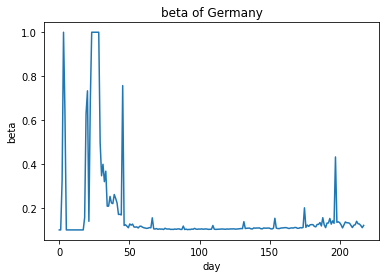

In [238]:
dat=np.linspace(0,len(lists[1][0]),len(lists[1][0]))
plt.plot(dat,(lists[1][0])) 
plt.title('beta of '+Country[number])
plt.xlabel('day')
plt.ylabel('beta')


Text(0, 0.5, 'gamma')

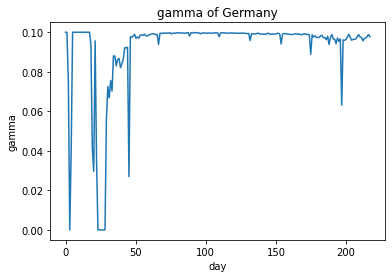

In [239]:
dat=np.linspace(0,len(Gamma),len(Gamma))
plt.plot(dat,(Gamma)) 
plt.title('gamma of '+Country[number])
plt.xlabel('day')
plt.ylabel('gamma')


Text(0, 0.5, 'mu')

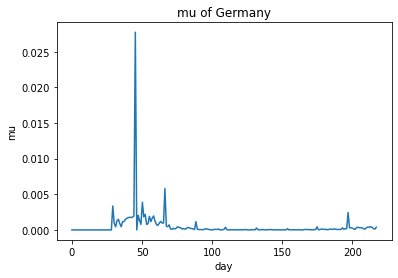

In [240]:
dat=np.linspace(0,len(Mu),len(Mu))
plt.plot(dat,(Mu)) 
plt.title('mu of '+Country[number])
plt.xlabel('day')
plt.ylabel('mu')


In [276]:
number=4
n=number
Data_Country=Data_of_Country(number)
[St,It,Rt,Dt]=take_SIRD_data(Data_Country,number)
St_now=St[0:len(St)-1]
It_now=It[0:len(It)-1]
Rt_now=Rt[0:len(Rt)-1]
Dt_now=Dt[0:len(Dt)-1]
It_true=It[1:]
Dt_true=Dt[1:]
[beta0,gamma0,mu0]=find_parameter(n)
[beta0,gamma0,mu0]=[0.01,0.01,0.0001]

In [277]:
def objective1(x):
  
  #參數 dt 單位天數
  dt=1
  eps=0.001
  St_pred=[]
  It_pred=[]
  Rt_pred=[]
  Dt_pred=[]
  beta=[]
  gamma=[]
  mu=[]
  N=population_N[number]
  for i in range(len(St)-1):
    beta.append(x[i])
    gamma.append(x[i+len(St)-1])
    mu.append(x[2*(len(St)-1)+i])
  St_now=St[0]
  It_now=It[0]
  Rt_now=Rt[0]
  Dt_now=Dt[0]
  #藉由finite difference method 做出下一個時間點的預測
  for j in range(len(St)-1):
    St_pred.append(St_now*(1-dt*beta[j]*It_now/N))
    It_pred.append(It_now*(1+dt*(beta[j]*St_now/N)-dt*(mu[j]+gamma[j])))
    Rt_pred.append(Rt_now+(dt*gamma[j]*It_now))
    Dt_pred.append(Dt_now+(dt*mu[j]*It_now))
  
    St_now=St_pred[-1]
    It_now=It_pred[-1]
    Rt_now=Rt_pred[-1]
    Dt_now=Dt_pred[-1]

  It_pred=np.array(It_pred)
  Dt_pred=np.array(Dt_pred)
  # loss function 只取用論文中使用的loss function  
  loss=0.01*(np.log(np.max(It))/np.max(It))*((It_true-It_pred)**2).sum()+((np.log(It_true+eps)-np.log(It_pred+eps))**2).sum()+(0.01*np.log(np.max(It))/np.max(It))*((Dt_true-Dt_pred)**2).sum()+((np.log(Dt_true+eps)-np.log(Dt_pred+eps))**2).sum()+(100*np.log(np.max(It))/np.max([beta0,gamma0,mu0]))*(((np.array(beta[0:len(St)-2])-np.array(beta[1:len(St)-1]))**2).sum()+((np.array(beta[0])-beta0)**2)+((np.array(gamma[0:len(St)-2])-np.array(gamma[1:len(St)-1]))**2).sum()+((np.array(gamma[0])-gamma0)**2)+(100*(np.array(mu[0:len(St)-2])-np.array(mu[1:len(St)-1]))**2).sum()+(100*(np.array(mu[0])-mu0)**2))
  return loss


In [278]:
x=(beta0*np.ones(len(St)-1)).tolist()
y=(gamma0*np.ones(len(St)-1)).tolist()
z=(mu0*np.ones(len(St)-1)).tolist()
X=np.array(x+y+z)

b=np.hstack([(0.0*np.ones(len(St)-1)).reshape(len(St)-1,1),(1*np.ones(len(St)-1)).reshape(len(St)-1,1)])
bnds =np.vstack([b.tolist(), b.tolist(), b.tolist()])

Sol=minimize(objective1,X,bounds=bnds,options={'disp':True,'maxfun':600000,'maxiter':60000})#

In [279]:
objective1(Sol.x)#-objective1(X)

10203.855553153848

In [280]:
Italy_beta=Sol.x[0:(len(St)-1)]
Italy_gamma=Sol.x[(len(St)-1):2*(len(St)-1)]
Italy_mu=Sol.x[2*(len(St)-1):]

Text(0.5, 0, 'day')

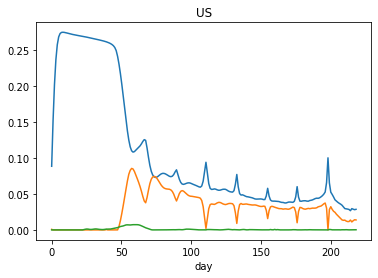

In [281]:
import matplotlib.pyplot as plt
dat=np.linspace(0,len(St)-1,len(St)-1)
plt.plot(dat,Sol.x[0:(len(St)-1)])
plt.plot(dat,Sol.x[(len(St)-1):2*(len(St)-1)])

plt.plot(dat,Sol.x[2*(len(St)-1):]) 
#plt.title('beta of '+Country[number])
plt.title(Country[number])

plt.xlabel('day')
#plt.ylabel('beta')


預測


In [16]:
import xgboost as xgb
import matplotlib.pyplot as plt

In [282]:
#國家人口數據
Country=['Netherlands','United Kingdom','France','Belgium','Spain','Italy','Germany','US','Egypt','Kenya','Japan','Austria','Qatar']
population_N=[17.5*1000000,66.56*1000000,66.99*1000000,11.46*1000000, 46.94*1000000 , 60.36*1000000, 83.02*1000000 ,327.2*1000000,10*1000000,4.8*1000000, 1386*1000000 ]

用部分的資料做訓練資料，訓練完再預測後面天數。

In [287]:
Death_train=[]
Death_trainlabel=[]

Infected_train=[]
Infected_trainlabel=[]

for j in range(5):
  [It,Rt,Dt]=SIRD_data(DATA,j)
  It=It.reshape(len(It),1)
  Rt=Rt.reshape(len(Rt),1)
  Dt=Dt.reshape(len(Dt),1)
  IRD_data_pair=np.hstack([It,Rt,Dt])
  for i in range(0,round(len(IRD_data_pair)*0.6)-30):
    
    I_mean=It[i:i+30].mean()
    I_std=It[i:i+30].std()+1
    R_mean=Rt[i:i+30].mean()
    R_std=Rt[i:i+30].std()+1
    D_mean=Dt[i:i+30].mean()
    D_std=Dt[i:i+30].std()+1
    
    I_Mean=It.mean()
    I_Std=It.std()
    R_Mean=Rt.mean()
    R_Std=Rt.std()
    D_Mean=Dt.mean()
    D_Std=Dt.std()  #((Rt[i:i+30]-R_mean)/R_std),
    

    Infected_train.append(np.hstack([((It[i:i+30]-I_mean)/I_std),((Dt[i:i+30]-D_mean)/D_std)]).reshape(2*30,1).tolist())
    Infected_trainlabel.append((It[i+30]-I_mean)/I_std)

    Death_train.append(np.hstack([((It[i:i+30]-I_mean)/I_std),((Dt[i:i+30]-D_mean)/D_std)]).reshape(2*30,1).tolist())
    Death_trainlabel.append((Dt[i+30]-D_mean)/D_std)



Death_train=np.array(Death_train).reshape(len(Death_train),60)
Death_trainlabel=np.array(Death_trainlabel).reshape(-1,1)


Infected_train=np.array(Infected_train).reshape(len(Infected_train),60)
Infected_trainlabel=np.array(Infected_trainlabel).reshape(-1,1)


第一種作參考基準的方法，linear regression

In [288]:
from sklearn.linear_model import LinearRegression
reg_D = LinearRegression().fit(Death_train,Death_trainlabel)
reg_I = LinearRegression().fit(Infected_train,Infected_trainlabel)

比較方法 XGBoost

In [289]:
data_dmatrix_D = xgb.DMatrix(data=Death_train,label=Death_trainlabel)
data_dmatrix_I = xgb.DMatrix(data=Infected_train,label=Infected_trainlabel)

param = {'max_depth':10, 'eta':0.5,'booster':'gbtree'}
num_round = 100
bst_D = xgb.train(param,data_dmatrix_D,num_round)
bst_I = xgb.train(param,data_dmatrix_I,num_round)


開始預測

XGboost預測死亡最大誤差 679.1031972957003
XGboost平均死亡誤差和標準差 [9.390691141664005, 61.8475698038835]
Linear resgression預測死亡最大誤差 144.3154673960944
Linear resgression平均死亡誤差和標準差 [8.013143146613489, 23.09850816228632]

XGboost預測感染最大誤差 13083.394617120466
XGboost平均感染誤差和標準差 [-136.56684696234177, 1487.7443456022143]
Linear resgression預測感染最大誤差 11473.263299414968
Linear resgression平均死亡誤差和標準差 [330.1542294953394, 1442.9397659883496]



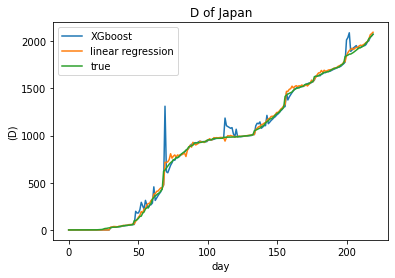

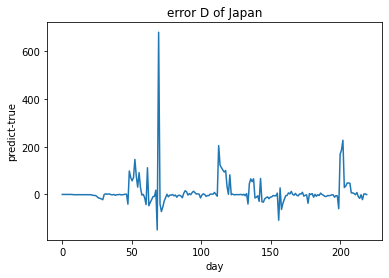

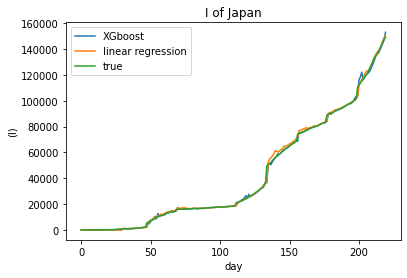

In [290]:
Death_test=[]
Death_testlabel=[]

Infected_test=[]
Infected_testlabel=[]

Infected_true=[]
Death_true=[]
I_Means=[]
I_Stds=[]

D_Means=[]
D_Stds=[]


number=10
[It,Rt,Dt]=SIRD_data(DATA,number)
It=It.reshape(len(It),1)
Rt=Rt.reshape(len(Rt),1)
Dt=Dt.reshape(len(Dt),1)
IRD_data_pair=np.hstack([It,Rt,Dt])
for i in range(len(IRD_data_pair)-30):
 

  I_mean=It[i:i+30].mean()
  I_std=It[i:i+30].std()+1
  R_mean=Rt[i:i+30].mean()
  R_std=Rt[i:i+30].std()+1
  D_mean=Dt[i:i+30].mean()
  D_std=Dt[i:i+30].std()+1


  Infected_test.append(np.hstack([((It[i:i+30]-I_mean)/I_std),((Dt[i:i+30]-D_mean)/D_std)]).tolist())
  Death_test.append(np.hstack([((It[i:i+30]-I_mean)/I_std),((Dt[i:i+30]-D_mean)/D_std)]).tolist())
  
  Infected_true.append((It[i+30]-I_mean)/I_std)
  Death_true.append((Dt[i+30]-D_mean)/D_std)
  
  I_Means.append(I_mean)
  I_Stds.append(I_std)
  
  D_Means.append(D_mean)
  D_Stds.append(D_std)
  
Death_test=np.array(Death_test).reshape(len(Death_test),60)
Infected_test=np.array(Infected_test).reshape(len(Infected_test),60)
I_Means=np.array(I_Means).reshape(len(I_Means),1)
I_Stds=np.array(I_Stds).reshape(len(I_Stds),1)

D_Means=np.array(D_Means).reshape(len(D_Means),1)
D_Stds=np.array(D_Stds).reshape(len(D_Stds),1)

  
Death_true=np.array(Death_true).reshape(-1,1)


Infected_true=np.array(Infected_true).reshape(-1,1)

# make prediction
preds_D = bst_D.predict(xgb.DMatrix(Death_test))
preds_I = bst_I.predict(xgb.DMatrix(Infected_test))


plt.figure()
dat=np.linspace(0,len(Dt),len(Dt))

XGD=np.vstack([np.zeros(30).reshape(-1,1),preds_D.reshape(-1,1)*D_Stds+D_Means])
res_D=np.vstack([np.zeros(30).reshape(-1,1),reg_D.predict(Death_test)*D_Stds+D_Means])

plt.plot(dat,XGD,label='XGboost') #預測人數
plt.plot(dat,res_D,label='linear regression')

plt.plot(dat,Dt,label='true')#實際人數

#plt.yscale("log")

plt.title('D of '+Country[number])
plt.xlabel('day')
plt.ylabel('(D)')
plt.legend()

plt.figure()
dat=np.linspace(0,len(Dt),len(Dt))
plt.plot(dat,XGD-Dt) #預測人數
plt.title('error D of '+Country[number])
plt.xlabel('day')
plt.ylabel('predict-true')


#infected

plt.figure()

dat=np.linspace(0,len(It),len(It))

XGI=np.vstack([np.zeros(30).reshape(-1,1),(preds_I.reshape(-1,1))*I_Stds+I_Means])
res_I=np.vstack([np.zeros(30).reshape(-1,1),(reg_I.predict(Infected_test).reshape(-1,1))*I_Stds+I_Means])



plt.plot(dat,XGI,label='XGboost') #預測人數
plt.plot(dat,res_I,label='linear regression')
plt.plot(dat,It,label='true')#實際人數

#plt.yscale("log")
plt.title('I of '+Country[number])
plt.xlabel('day')
plt.ylabel('(I)')
plt.legend()
#plt.ylim((0))

print('XGboost預測死亡最大誤差',np.linalg.norm((XGD-Dt),np.inf))
print('XGboost平均死亡誤差和標準差',[(XGD-Dt).mean(),(XGD-Dt).std()])

print('Linear resgression預測死亡最大誤差',np.linalg.norm((res_D-Dt),np.inf))
print('Linear resgression平均死亡誤差和標準差',[(res_D-Dt).mean(),(res_D-Dt).std()])
print('')
print('XGboost預測感染最大誤差',np.linalg.norm((XGI-It),np.inf))

print('XGboost平均感染誤差和標準差',[(XGI-It).mean(),(XGI-It).std()])
print('Linear resgression預測感染最大誤差',np.linalg.norm((res_I-It),np.inf))
print('Linear resgression平均死亡誤差和標準差',[(res_I-It).mean(),(res_I-It).std()])
print('')

XGboost預測死亡最大誤差 696.1479542315074
XGboost平均死亡誤差和標準差 [5.441299405224781, 89.34047344271718]
Linear resgression預測死亡最大誤差 1179.122691440494
Linear resgression平均死亡誤差和標準差 [44.31733992128448, 171.7861361783114]

XGboost預測感染最大誤差 62424.35048647225
XGboost平均感染誤差和標準差 [-408.37107034451867, 6281.499249108943]
Linear resgression預測感染最大誤差 45838.08606293955
Linear resgression平均死亡誤差和標準差 [1547.6725724614237, 6829.472254753501]



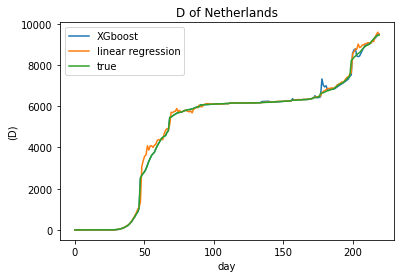

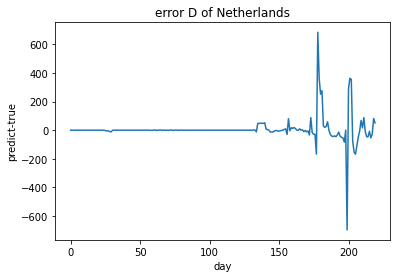

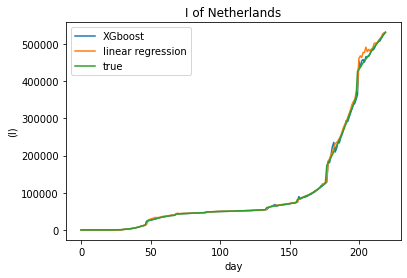

In [22]:
Death_test=[]
Death_testlabel=[]

Infected_test=[]
Infected_testlabel=[]

Infected_true=[]
Death_true=[]
I_Means=[]
I_Stds=[]

D_Means=[]
D_Stds=[]


number=0
[It,Rt,Dt]=SIRD_data(DATA,number)
It=It.reshape(len(It),1)
Rt=Rt.reshape(len(Rt),1)
Dt=Dt.reshape(len(Dt),1)
IRD_data_pair=np.hstack([It,Rt,Dt])
for i in range(len(IRD_data_pair)-30):
 

  I_mean=It[i:i+30].mean()
  I_std=It[i:i+30].std()+1
  R_mean=Rt[i:i+30].mean()
  R_std=Rt[i:i+30].std()+1
  D_mean=Dt[i:i+30].mean()
  D_std=Dt[i:i+30].std()+1


  Infected_test.append(np.hstack([((It[i:i+30]-I_mean)/I_std),((Dt[i:i+30]-D_mean)/D_std)]).tolist())
  Death_test.append(np.hstack([((It[i:i+30]-I_mean)/I_std),((Dt[i:i+30]-D_mean)/D_std)]).tolist())
  
  Infected_true.append((It[i+30]-I_mean)/I_std)
  Death_true.append((Dt[i+30]-D_mean)/D_std)
  
  I_Means.append(I_mean)
  I_Stds.append(I_std)
  
  D_Means.append(D_mean)
  D_Stds.append(D_std)
  
Death_test=np.array(Death_test).reshape(len(Death_test),60)
Infected_test=np.array(Infected_test).reshape(len(Infected_test),60)
I_Means=np.array(I_Means).reshape(len(I_Means),1)
I_Stds=np.array(I_Stds).reshape(len(I_Stds),1)

D_Means=np.array(D_Means).reshape(len(D_Means),1)
D_Stds=np.array(D_Stds).reshape(len(D_Stds),1)

  
Death_true=np.array(Death_true).reshape(-1,1)


Infected_true=np.array(Infected_true).reshape(-1,1)

# make prediction
preds_D = bst_D.predict(xgb.DMatrix(Death_test))
preds_I = bst_I.predict(xgb.DMatrix(Infected_test))


plt.figure()
dat=np.linspace(0,len(Dt),len(Dt))

XGD=np.vstack([np.zeros(30).reshape(-1,1),preds_D.reshape(-1,1)*D_Stds+D_Means])
res_D=np.vstack([np.zeros(30).reshape(-1,1),reg_D.predict(Death_test)*D_Stds+D_Means])

plt.plot(dat,XGD,label='XGboost') #預測人數
plt.plot(dat,res_D,label='linear regression')

plt.plot(dat,Dt,label='true')#實際人數

#plt.yscale("log")

plt.title('D of '+Country[number])
plt.xlabel('day')
plt.ylabel('(D)')
plt.legend()

plt.figure()
dat=np.linspace(0,len(Dt),len(Dt))
plt.plot(dat,XGD-Dt) #預測人數
plt.title('error D of '+Country[number])
plt.xlabel('day')
plt.ylabel('predict-true')


#infected

plt.figure()

dat=np.linspace(0,len(It),len(It))

XGI=np.vstack([np.zeros(30).reshape(-1,1),(preds_I.reshape(-1,1))*I_Stds+I_Means])
res_I=np.vstack([np.zeros(30).reshape(-1,1),(reg_I.predict(Infected_test).reshape(-1,1))*I_Stds+I_Means])



plt.plot(dat,XGI,label='XGboost') #預測人數
plt.plot(dat,res_I,label='linear regression')
plt.plot(dat,It,label='true')#實際人數

#plt.yscale("log")
plt.title('I of '+Country[number])
plt.xlabel('day')
plt.ylabel('(I)')
plt.legend()
#plt.ylim((0))

print('XGboost預測死亡最大誤差',np.linalg.norm((XGD-Dt),np.inf))
print('XGboost平均死亡誤差和標準差',[(XGD-Dt).mean(),(XGD-Dt).std()])

print('Linear resgression預測死亡最大誤差',np.linalg.norm((res_D-Dt),np.inf))
print('Linear resgression平均死亡誤差和標準差',[(res_D-Dt).mean(),(res_D-Dt).std()])
print('')
print('XGboost預測感染最大誤差',np.linalg.norm((XGI-It),np.inf))

print('XGboost平均感染誤差和標準差',[(XGI-It).mean(),(XGI-It).std()])
print('Linear resgression預測感染最大誤差',np.linalg.norm((res_I-It),np.inf))
print('Linear resgression平均死亡誤差和標準差',[(res_I-It).mean(),(res_I-It).std()])
print('')

預測10天後的結果

In [334]:
Death_train=[]
Death_trainlabel=[]

Infected_train=[]
Infected_trainlabel=[]

for j in range(5):
  [It,Rt,Dt]=SIRD_data(DATA,j)
  It=It.reshape(len(It),1)
  Rt=Rt.reshape(len(Rt),1)
  Dt=Dt.reshape(len(Dt),1)
  IRD_data_pair=np.hstack([It,Rt,Dt])
  for i in range(0,round(len(IRD_data_pair)*0.6)-40):
    
    I_mean=It[i:i+30].mean()
    I_std=It[i:i+30].std()+1
    R_mean=Rt[i:i+30].mean()
    R_std=Rt[i:i+30].std()+1
    D_mean=Dt[i:i+30].mean()
    D_std=Dt[i:i+30].std()+1
    
    I_Mean=It.mean()
    I_Std=It.std()
    R_Mean=Rt.mean()
    R_Std=Rt.std()
    D_Mean=Dt.mean()
    D_Std=Dt.std()  #((Rt[i:i+30]-R_mean)/R_std),
    

    Infected_train.append(np.hstack([((It[i:i+30]-I_mean)/I_std),((Dt[i:i+30]-D_mean)/D_std)]).reshape(2*30,1).tolist())
    Infected_trainlabel.append((It[i+40]-I_mean)/I_std)

    Death_train.append(np.hstack([((It[i:i+30]-I_mean)/I_std),((Dt[i:i+30]-D_mean)/D_std)]).reshape(2*30,1).tolist())
    Death_trainlabel.append((Dt[i+40]-D_mean)/D_std)



Death_train=np.array(Death_train).reshape(len(Death_train),60)
Death_trainlabel=np.array(Death_trainlabel).reshape(-1,1)


Infected_train=np.array(Infected_train).reshape(len(Infected_train),60)
Infected_trainlabel=np.array(Infected_trainlabel).reshape(-1,1)


In [335]:
from sklearn.linear_model import LinearRegression
reg_D = LinearRegression().fit(Death_train,Death_trainlabel)
reg_I = LinearRegression().fit(Infected_train,Infected_trainlabel)

In [336]:
data_dmatrix_D = xgb.DMatrix(data=Death_train,label=Death_trainlabel)
data_dmatrix_I = xgb.DMatrix(data=Infected_train,label=Infected_trainlabel)

param = {'max_depth':10, 'eta':0.5,'booster':'gbtree'}
num_round = 100
bst_D = xgb.train(param,data_dmatrix_D,num_round)
bst_I = xgb.train(param,data_dmatrix_I,num_round)


XGboost預測死亡最大誤差 31213.889961399982
XGboost平均死亡誤差和標準差 [-423.91870071598476, 3626.057871707906]
Linear resgression預測死亡最大誤差 187411.75516577027
Linear resgression平均死亡誤差和標準差 [6266.811059677038, 28983.009308433673]

XGboost預測感染最大誤差 1590120.5806183796
XGboost平均感染誤差和標準差 [-26315.010774439957, 164258.87708280416]
Linear resgression預測感染最大誤差 3065815.995878691
Linear resgression平均死亡誤差和標準差 [83185.20746957492, 429630.30551948474]



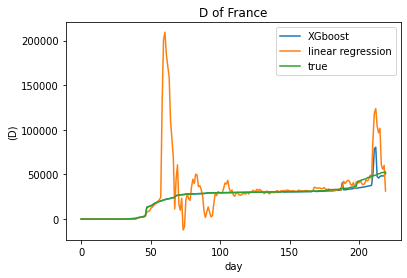

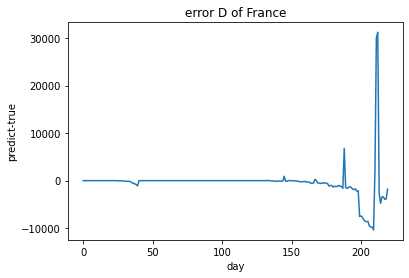

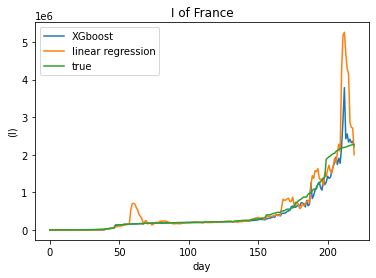

In [339]:
Death_test=[]
Death_testlabel=[]

Infected_test=[]
Infected_testlabel=[]

Infected_true=[]
Death_true=[]
I_Means=[]
I_Stds=[]

D_Means=[]
D_Stds=[]


number=2
[It,Rt,Dt]=SIRD_data(DATA,number)
It=It.reshape(len(It),1)
Rt=Rt.reshape(len(Rt),1)
Dt=Dt.reshape(len(Dt),1)
IRD_data_pair=np.hstack([It,Rt,Dt])
for i in range(len(IRD_data_pair)-40):
 

  I_mean=It[i:i+30].mean()
  I_std=It[i:i+30].std()+1
  R_mean=Rt[i:i+30].mean()
  R_std=Rt[i:i+30].std()+1
  D_mean=Dt[i:i+30].mean()
  D_std=Dt[i:i+30].std()+1


  Infected_test.append(np.hstack([((It[i:i+30]-I_mean)/I_std),((Dt[i:i+30]-D_mean)/D_std)]).tolist())
  Death_test.append(np.hstack([((It[i:i+30]-I_mean)/I_std),((Dt[i:i+30]-D_mean)/D_std)]).tolist())
  
  Infected_true.append((It[i+40]-I_mean)/I_std)
  Death_true.append((Dt[i+40]-D_mean)/D_std)
  
  I_Means.append(I_mean)
  I_Stds.append(I_std)
  
  D_Means.append(D_mean)
  D_Stds.append(D_std)
  
Death_test=np.array(Death_test).reshape(len(Death_test),60)
Infected_test=np.array(Infected_test).reshape(len(Infected_test),60)
I_Means=np.array(I_Means).reshape(len(I_Means),1)
I_Stds=np.array(I_Stds).reshape(len(I_Stds),1)

D_Means=np.array(D_Means).reshape(len(D_Means),1)
D_Stds=np.array(D_Stds).reshape(len(D_Stds),1)

  
Death_true=np.array(Death_true).reshape(-1,1)


Infected_true=np.array(Infected_true).reshape(-1,1)

# make prediction
preds_D = bst_D.predict(xgb.DMatrix(Death_test))
preds_I = bst_I.predict(xgb.DMatrix(Infected_test))


plt.figure()
dat=np.linspace(0,len(Dt),len(Dt))

XGD=np.vstack([np.zeros(40).reshape(-1,1),preds_D.reshape(-1,1)*D_Stds+D_Means])
res_D=np.vstack([np.zeros(40).reshape(-1,1),reg_D.predict(Death_test)*D_Stds+D_Means])

plt.plot(dat,XGD,label='XGboost') #預測人數
plt.plot(dat,res_D,label='linear regression')

plt.plot(dat,Dt[:len(Dt)],label='true')#實際人數

#plt.yscale("log")

plt.title('D of '+Country[number])
plt.xlabel('day')
plt.ylabel('(D)')
plt.legend()

plt.figure()
dat=np.linspace(0,len(Dt),len(Dt))
plt.plot(dat,XGD-Dt) #預測人數
plt.title('error D of '+Country[number])
plt.xlabel('day')
plt.ylabel('predict-true')


#infected

plt.figure()

dat=np.linspace(0,len(It),len(It))

XGI=np.vstack([np.zeros(40).reshape(-1,1),(preds_I.reshape(-1,1))*I_Stds+I_Means])
res_I=np.vstack([np.zeros(40).reshape(-1,1),(reg_I.predict(Infected_test).reshape(-1,1))*I_Stds+I_Means])



plt.plot(dat,XGI,label='XGboost') #預測人數
plt.plot(dat,res_I,label='linear regression')
plt.plot(dat,It,label='true')#實際人數

#plt.yscale("log")
plt.title('I of '+Country[number])
plt.xlabel('day')
plt.ylabel('(I)')
plt.legend()
#plt.ylim((0))

print('XGboost預測死亡最大誤差',np.linalg.norm((XGD-Dt),np.inf))
print('XGboost平均死亡誤差和標準差',[(XGD-Dt).mean(),(XGD-Dt).std()])

print('Linear resgression預測死亡最大誤差',np.linalg.norm((res_D-Dt),np.inf))
print('Linear resgression平均死亡誤差和標準差',[(res_D-Dt).mean(),(res_D-Dt).std()])
print('')
print('XGboost預測感染最大誤差',np.linalg.norm((XGI-It),np.inf))

print('XGboost平均感染誤差和標準差',[(XGI-It).mean(),(XGI-It).std()])
print('Linear resgression預測感染最大誤差',np.linalg.norm((res_I-It),np.inf))
print('Linear resgression平均死亡誤差和標準差',[(res_I-It).mean(),(res_I-It).std()])
print('')

In [40]:
np.where(np.array(US_gamma)>0.01)

(array([ 0,  1,  2,  6,  8,  9, 10, 11, 12, 13, 14, 17, 19]),)